In [1]:
import numpy as np
import pickle
from src.DFCompare import *

In [2]:
def readPreviousResults(previous_simulation_file):
    
    with open(previous_simulation_file, "rb") as handle:
        previous_results = pickle.load(handle)

    return previous_results



def getResults(results, variable_name):

    for i in range(len(results)):
        if results[i][0] == variable_name:
            variable = results[i][1]
            return variable

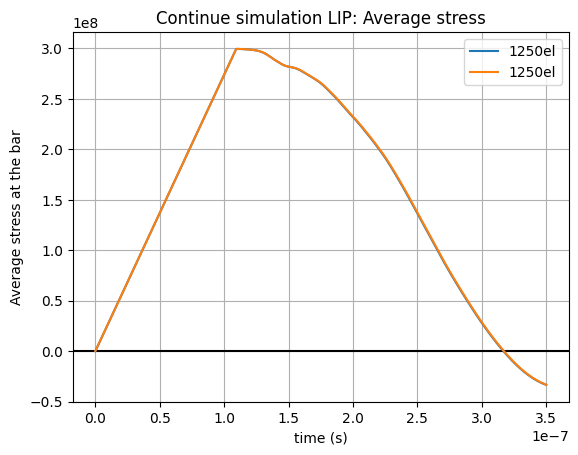

In [18]:
time_data = readResults(f"LOG/test/lipfield_", "time_data")
n_steps = time_data[2]
time_simulation = time_data[0]


file_path = "LOG/test/lipfield_step_"

avg_stress_bar = np.zeros(n_steps)
n_fragments = np.zeros(n_steps)

for i in range(n_steps):
    file = file_path + str(i) + '_.pickle'
    results = readPreviousResults(file)
    avg_stress_bar[i] = getResults(results, "avg_stress_bar")

n_steps = n_steps

time = np.linspace(0, time_simulation, n_steps)


filepath = "LOG/mesh_study/lipfield_uniform_mesh/"

file_address = filepath + "1250el/lipfield_"
d_1250el = readResults(file_address, "d")
n_fragments_1250el = readResults(file_address, "n_fragments")
avg_frag_size_1250el = readResults(file_address, "avg_frag_size")
avg_stress_bar_1250el = readResults(file_address, "avg_stress_bar")
time_data_1250el = readResults(file_address, "time_data")
n_steps_1250el = time_data_1250el[2]

stress_bar = [
    ["1250el", time, avg_stress_bar],
    ["1250el", time, avg_stress_bar_1250el],
]

plotCompareSimulations(
    stress_bar,
    title="Continue simulation LIP: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar",
    save_filename="LOG/avg_stress_test.svg",
)
